# **SVM**

**Use the Iris dataset from sklearn.datasets to classify flower species using a Support Vector Machine (SVM) classifier. Your task is to:**

##### 1)Load and explore the dataset.

##### 2)Split the data into training and test sets (70-30 split).

##### 3)Train an SVM classifier with an RBF kernel.

##### 4)Predict the test set results.

##### 5)Evaluate the model using accuracy score and confusion matrix.

##### 6)(Optional) Visualize the decision boundaries using two selected features.

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
iris = load_iris()

In [11]:
ir = iris.data

In [12]:
data = pd.DataFrame(ir, columns=iris.feature_names)

In [13]:
data 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
data['target'] = iris.target

In [15]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
X = data.drop(columns={'target'})

In [17]:
y = data['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30,random_state=42)

In [19]:
svm = SVC(kernel='rbf')

In [20]:
svm.fit(X_train, y_train)

SVC()

In [21]:
y_pred_s = svm.predict(X_test)

In [22]:
svm.score(X_test, y_test)

1.0

In [23]:
accuracy_score(y_test, y_pred_s)

1.0

In [24]:
cm = confusion_matrix(y_test, y_pred_s)

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

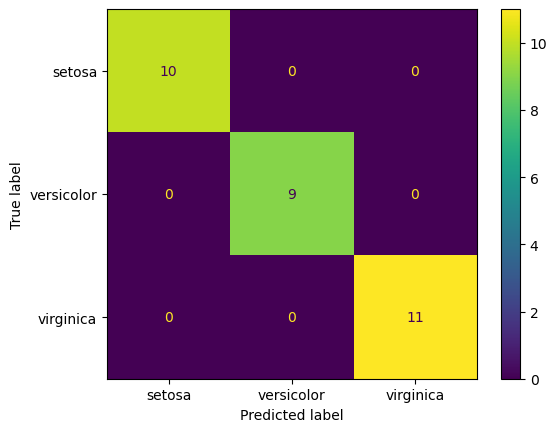

In [26]:
cmd = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
cmd.plot()

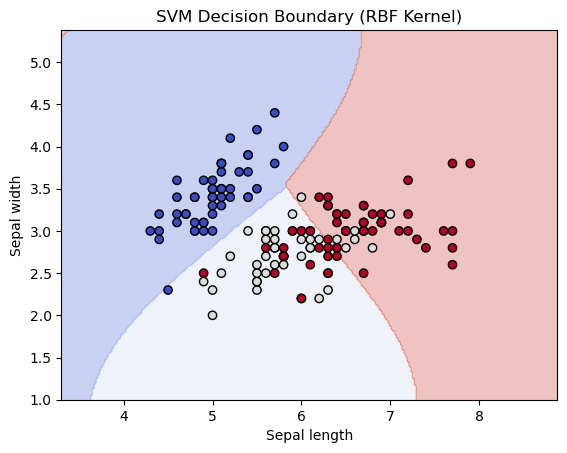

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load dataset and select two features for visualization
iris = datasets.load_iris()
X = iris.data[:, :2]  # use only sepal length and sepal width
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.show()


In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

y_pred_scores = clf.decision_function(X_test)  # Not clf.predict()

from sklearn.metrics import hinge_loss

hinge_loss(y_test, y_pred_scores)

0.5082533511926505